# NEXTdrawings DuelingBandits - stub.yamlStyle Assembly
-  Karl Rosengren, PI; Heather Kirkorian, PI; Tim Rogers, PI;  University of Wisconsin – Madison
-  Clint Jensen, Graduate Student, University of Wisconsin – Madison

This script does some basic analysis and concatenates NEXT data. NEXT is an online suite of algorithms that allow for the presentation of stimuli (images, text, videos), so that participants can make judgments providing group level data about the set of stimuli presented. Additional tools within NEXT allow for the visualization of that data into representations, such as multidimensional spaces or rank order graphs. NEXT is hosted on AWS as an Amazon Machine Image (AMI). Participants for this project were Amazon MTurk workers. Each MTurk worker was asked to make 200 judgements and was paid 1 dollar for what was intended to be 10 minutes of work. 

### Script concatenates NEXTdrawings DAP, as well as CUBE and CYLINDER 2D and 3D Objects and Renderings data for DuelingBandits NEXT data in format needed for stub.yaml file

#### Drawing Study 1: Drawing Across Media (DAM)

* Mediums: Children and adults copied simple shapes using each of three mediums (marker on paper, stylus on tablet, finger on tablet). 

* Shape copies: They copied 4 familiar shapes (circle=CI, square=SQ, triangle=TR, cross=CR) and 2 novel shapes (novel triangle=NT, novel cross=NC) using each of the three mediums, resulting in 18 shape copies per participant (1 for each shape/medium combination)

* Draw-a-person: They also drew a person using each of the three mediums (3 person drawings per participant). 


#### Drawing Study 3: Drawing 2D and 3D Objects and Renderings 
-- Study 3 also had children draw-a-person, which produced drawings used in our overall DAP analysis 

* Mediums: Children and adults copied simple shapes using each of three mediums (marker on paper, stylus on tablet, finger on tablet). 

* One 2D rendering was assigned to the marker-paper condition and the other was assigned to the two tablet conditions (stylus and finger). The opposite shape was used for 3D object drawings (e.g., if the paper condition has 2D cube and 3D cylinder, then the two tablet conditions have 3D cube and 2D cylinder).  
 
* For Study 3 DAP images, children drew one person at the end of the study during free draw, using a medium of their choice (they first chose a surface, then the marker/stylus was placed on the table to use if they wanted). 
 

### Code Book for Analysis Critical Elements
* Subject IDs for children are "DAM" followed by 3-digit number (e.g., DAM001). Subject IDs for adults are "DAMa" followed by 3-digit number (e.g., DAMa001). 
* marker on paper - (_P_)
* stylus on tablet - (_T_)
* finger on tablet - (_F_)


* Participant.ID - NEXT generated ID -- different from MTurk ID
* Timestamp - Date of participation -- stub.yaml requires a very specific format, script may need adjustment given potential .csv adjustments in Excel 
* Center - Image presented at top center -- images that the other two images are compared against for similarity judgement
* Left - Image presented at bottom left
* Right - Image presented at bottom right 
* Answer - Image participants chose as most similar to Center image
* Alg.label - All set to Test initially, these are adjusted to include 90% training designation and 10% test to create a hold out set for model fit comparisons
* Response.Time..s. - Response time for individual triplet set
* Participant.ID.sub - NEXT generated ID minus experimentID
* Condition - Name given to Study within this script
* Session - - NEXT generated ID experimentID

#### Setting CRAN to load packages (Might be necessary depending on how jupyter is loaded)

In [51]:
options(repos=structure(c(CRAN="https://rweb.crmda.ku.edu/cran/")))

#### Loading packages used in analysis, plots, data managment

In [52]:
#-----------------------------------------------------------------------------------------------------------
#AUTOMATING PACKAGES NEEDED

haspackage = require("tidyverse") # used for data structure codes
if (haspackage==FALSE){
  install.packages("tidyverse")    
    }

library(tidyverse)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ readr   1.3.1
✔ tibble  2.1.3     ✔ purrr   0.3.4
✔ ggplot2 3.2.1     ✔ forcats 0.4.0
Warning message:
“package ‘purrr’ was built under R version 3.6.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# <font color='BLUE'>  Draw-A-Person (DAP) </font>

#### Setting R to file where data is stored

In [56]:
#PC - must map network Z drive to rogerslab.drive.wisc.edu first
#setwd("Z:/NEXT/NEXTdrawings/Data/NEXTdrawingsData/DAP_DuelingBandits/NEXT_Output")

#Mac - must connect to rogerslab.drive.wisc.edu first
setwd("/Volumes/rogerslab/NEXT/NEXTdrawings/Data/NEXTdrawingsData/DAP_DuelingBandits/NEXT_Output")

In [57]:
filenames <- list.files(pattern="*.csv")

In [58]:
filenames

[1] "NEXTdrawings DAP Data 2019_05_01.csv"
[2] "NEXTdrawings DAP Data 2019_05_14.csv"

In [59]:
Server_data <- list.files(pattern="*.csv", full.names = TRUE)
d_DuelingBandits <- do.call(rbind, lapply(Server_data,read.csv))

#### Checking data file

In [60]:
d_DuelingBandits

X,alg_id,alg_label,context,context_type,exp_uid,left_id,network_delay,participant_uid,query_uid,response_time,right_id,target_left,target_right,target_winner,timestamp_answer_received,timestamp_query_generated,winner_id
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
0,BR_Random,BR_Random,Choose the image below that is the better drawing of a person,text,3f79018a4fdda45cb0e91058e9df3a,246,0.608591,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,a8cdf4c81ff1079b93e8417ebf59bdd7,5.369,46,http://clintsbucket.s3.amazonaws.com/DAM3D060_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM016_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D060_P_DAPedit.jpg,00:06.5,00:00.5,246
1,BR_Random,BR_Random,Choose the image below that is the better drawing of a person,text,3f79018a4fdda45cb0e91058e9df3a,228,0.525857,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,94395361878fd0fc1848ae84216ba7db,1.442,14,http://clintsbucket.s3.amazonaws.com/DAM3D031_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM005_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D031_T_DAPedit.jpg,00:09.1,00:07.2,228
2,BR_Random,BR_Random,Choose the image below that is the better drawing of a person,text,3f79018a4fdda45cb0e91058e9df3a,245,0.519814,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,70b90ff997ff3de6aa448c6b3f894cac,1.112,28,http://clintsbucket.s3.amazonaws.com/DAM3D059_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM010_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D059_T_DAPedit.jpg,00:11.5,00:09.9,245
3,BR_Random,BR_Random,Choose the image below that is the better drawing of a person,text,3f79018a4fdda45cb0e91058e9df3a,287,0.544129,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,9488479f1848e6ac0aa45b5b9e40ee75,1.132,159,http://clintsbucket.s3.amazonaws.com/DAMa017_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM065_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAMa017_F_DAPedit.jpg,00:13.8,00:12.1,287
4,BR_Random,BR_Random,Choose the image below that is the better drawing of a person,text,3f79018a4fdda45cb0e91058e9df3a,196,0.443675,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,746cca544783265c89505e167f403246,0.942,118,http://clintsbucket.s3.amazonaws.com/DAM082_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM048_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM048_F_DAPedit.jpg,00:15.8,00:14.4,118
5,BR_Random,BR_Random,Choose the image below that is the better drawing of a person,text,3f79018a4fdda45cb0e91058e9df3a,204,0.457193,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,b97cb016a7cd3fd606ec87ab3c081b97,1.653,68,http://clintsbucket.s3.amazonaws.com/DAM085_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM026_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM026_F_DAPedit.jpg,00:18.6,00:16.4,68
6,BR_Random,BR_Random,Choose the image below that is the better drawing of a person,text,3f79018a4fdda45cb0e91058e9df3a,73,0.522172,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,d2fd61392847c990ef974a112acd694b,2.457,37,http://clintsbucket.s3.amazonaws.com/DAM027_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM013_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM027_T_DAPedit.jpg,00:22.2,00:19.2,73
7,BR_Random,BR_Random,Choose the image below that is the better drawing of a person,text,3f79018a4fdda45cb0e91058e9df3a,79,0.429465,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,5912c76916afa95137bf520e5c2c6e6a,0.922,111,http://clintsbucket.s3.amazonaws.com/DAM029_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM044_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM029_T_DAPedit.jpg,00:24.2,00:22.8,79
8,BR_Random,BR_Random,Choose the image below that is the better drawing of a person,text,3f79018a4fdda45cb0e91058e9df3a,14,0.557154,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,4997fd0841e695f8d5

### Number of Participants Total

In [61]:
# how many subjects in total?
aggregate(participant_uid~participant_uid  , data=d_DuelingBandits, FUN=function(x) length(unique(x)))

participant_uid
<int>
58


### Total Number of NEXTdrawings Selections

In [62]:
d_DuelingBandits  %>% count("participant_uid")

"""participant_uid""",n
<chr>,<int>
participant_uid,10107


In [63]:
Selections <-
d_DuelingBandits %>%
 count(exp_uid, participant_uid, sort = TRUE)
Selections

exp_uid,participant_uid,n
<fct>,<fct>,<int>
3f79018a4fdda45cb0e91058e9df3a,3f79018a4fdda45cb0e91058e9df3a_5TPUjUICaHMugj5AU28qJdo2dc1UFK,200
3f79018a4fdda45cb0e91058e9df3a,3f79018a4fdda45cb0e91058e9df3a_9tm7sAH33VG1RgFfddNld0RldyGYiL,200
3f79018a4fdda45cb0e91058e9df3a,3f79018a4fdda45cb0e91058e9df3a_Bamc1TQVOucUqK6HyKMhqEPFgswKfh,200
3f79018a4fdda45cb0e91058e9df3a,3f79018a4fdda45cb0e91058e9df3a_gT4r91AuwbMjRlVemPtgPnE2goN0eF,200
3f79018a4fdda45cb0e91058e9df3a,3f79018a4fdda45cb0e91058e9df3a_IQS3NwA5Cjf45s9pJsfUEIIbr91Zc6,200
3f79018a4fdda45cb0e91058e9df3a,3f79018a4fdda45cb0e91058e9df3a_OCu6dAnsuADwEuKhgDEkV6QAuJk8Qb,200
3f79018a4fdda45cb0e91058e9df3a,3f79018a4fdda45cb0e91058e9df3a_ptXZOii3NFcorMs4v6k6k9MOyz22Rs,200
3f79018a4fdda45cb0e91058e9df3a,3f79018a4fdda45cb0e91058e9df3a_RAlSjwFo4rGsmHxvMf5J3PVuxRSoiZ,200
3f79018a4fdda45cb0e91058e9df3a,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,200


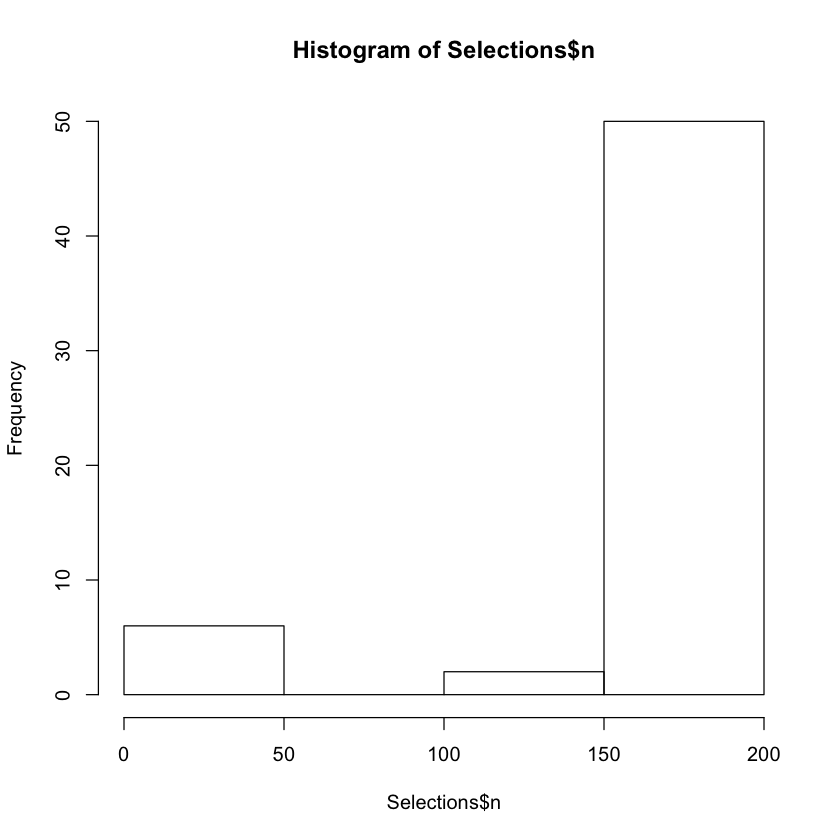

In [64]:
#Quick plot - Doesn't show up in Jupyterlab but does in standard Jupyter notebook
# perhaps because of black screen view??
hist(Selections$n)

#### Adjusting Dataframe for Visualization

In [65]:
#select( ) function: #Objective - Reduce dataframe size to only desired variables for current task

sub <- select(d_DuelingBandits,participant_uid, timestamp_answer_received, 
              target_left, target_right, target_winner, alg_label, response_time)

#### Removing underscores from variable names for clairity and renaming so that elements can be put in order stub.yaml requires

#### If you get a Warning message, check whether the image files are .jpg or .jpeg and change accordingly.

e.g. Warning message:
"Too few values at 22652 locations: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ..."

In [66]:
# separating data based on underscore used in distinguishing common elements among variables
#separate( ) function: #Objective - Splitting a single variable into two

sub <- separate(sub, target_right, 
                        c("bucket3", "tr"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tr, 
                        c("Right", "bucket4"), sep = ".jpg", remove = TRUE, convert = FALSE)

sub <- separate(sub, target_left, 
                        c("bucket5", "tl"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tl, 
                        c("Left", "bucket6"), sep = ".jpg", remove = TRUE,  convert = FALSE)

sub <- separate(sub, target_winner, 
                        c("bucket7", "tw"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tw, 
                        c("Answer", "bucket8"), sep = ".jpg", remove = TRUE,  convert = FALSE)

#### Selecting variables that are needed

In [67]:
d_DuelingBandits_sub <- select(sub,participant_uid, timestamp_answer_received, Left, Right, Answer, alg_label, response_time)

#### Renaming Variables 

In [68]:
d_DuelingBandits_sub$Participant.ID <- d_DuelingBandits_sub$participant_uid

In [69]:
d_DuelingBandits_sub <- separate(d_DuelingBandits_sub, participant_uid, 
                            c("Session", "Participant.ID.sub"), sep = "_", remove = TRUE, convert = FALSE)

In [70]:
d_DuelingBandits_sub <- d_DuelingBandits_sub %>% 
  rename(
     Timestamp = timestamp_answer_received,
     Response.Time..s. = response_time,
     Alg.Label = alg_label
    )

#### Creating labeled Condition variable

In [71]:
d_DuelingBandits_sub <- d_DuelingBandits_sub %>% 
  mutate(Condition = "DAP_DuelingBandits")

#### Checking state of data

In [72]:
d_DuelingBandits_sub 

Session,Participant.ID.sub,Timestamp,Left,Right,Answer,Alg.Label,Response.Time..s.,Participant.ID,Condition
<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>,<fct>,<chr>
3f79018a4fdda45cb0e91058e9df3a,z43CNS8nyR6lHcwvHh6cDDsPQclhQm,00:06.5,DAM3D060_P_DAPedit,DAM016_P_DAPedit,DAM3D060_P_DAPedit,BR_Random,5.369,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,DAP_DuelingBandits
3f79018a4fdda45cb0e91058e9df3a,z43CNS8nyR6lHcwvHh6cDDsPQclhQm,00:09.1,DAM3D031_T_DAPedit,DAM005_T_DAPedit,DAM3D031_T_DAPedit,BR_Random,1.442,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,DAP_DuelingBandits
3f79018a4fdda45cb0e91058e9df3a,z43CNS8nyR6lHcwvHh6cDDsPQclhQm,00:11.5,DAM3D059_T_DAPedit,DAM010_P_DAPedit,DAM3D059_T_DAPedit,BR_Random,1.112,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,DAP_DuelingBandits
3f79018a4fdda45cb0e91058e9df3a,z43CNS8nyR6lHcwvHh6cDDsPQclhQm,00:13.8,DAMa017_F_DAPedit,DAM065_T_DAPedit,DAMa017_F_DAPedit,BR_Random,1.132,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,DAP_DuelingBandits
3f79018a4fdda45cb0e91058e9df3a,z43CNS8nyR6lHcwvHh6cDDsPQclhQm,00:15.8,DAM082_F_DAPedit,DAM048_F_DAPedit,DAM048_F_DAPedit,BR_Random,0.942,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,DAP_DuelingBandits
3f79018a4fdda45cb0e91058e9df3a,z43CNS8nyR6lHcwvHh6cDDsPQclhQm,00:18.6,DAM085_F_DAPedit,DAM026_F_DAPedit,DAM026_F_DAPedit,BR_Random,1.653,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,DAP_DuelingBandits
3f79018a4fdda45cb0e91058e9df3a,z43CNS8nyR6lHcwvHh6cDDsPQclhQm,00:22.2,DAM027_T_DAPedit,DAM013_P_DAPedit,DAM027_T_DAPedit,BR_Random,2.457,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,DAP_DuelingBandits
3f79018a4fdda45cb0e91058e9df3a,z43CNS8nyR6lHcwvHh6cDDsPQclhQm,00:24.2,DAM029_T_DAPedit,DAM044_P_DAPedit,DAM029_T_DAPedit,BR_Random,0.922,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,DAP_DuelingBandits
3f79018a4fdda45cb0e91058e9df3a,z43CNS8nyR6lHcwvHh6cDDsPQclhQm,00:26.6,DAM005_T_DAPedit,DAMa009_F_DAPedit,DAMa009_F_DAPedit,BR_Random,0.971,3f79018a4fdda45cb0e91058e9df3a_z43CNS8nyR6lHcwvHh6cDDsPQclhQm,DAP_DuelingBandits


#### Creating a Random Number to turn some trials into Training cases and some into Test for holdout model comparison

In [73]:
d_DuelingBandits_sub$RandNum <- sample(10, size = nrow(d_DuelingBandits_sub), replace = TRUE)

In [74]:
d_DuelingBandits_sub <- d_DuelingBandits_sub %>%
     mutate(Alg.Label= sub("BR_Random", "Train",Alg.Label))

In [75]:
DuelingBandits_data <- d_DuelingBandits_sub %>% mutate(Alg.Label = ifelse(Alg.Label == "Train" & RandNum == 1, "Test", "Train"))

#### Removing Random Number created for model comparison

In [76]:
DuelingBandits_data <- select (DuelingBandits_data,-c(RandNum))

#### Reorganizing variables for stub.yaml processing

In [77]:
DuelingBandits_data <- DuelingBandits_data[,c("Participant.ID","Timestamp","Left","Right","Answer",
          "Alg.Label","Response.Time..s.","Participant.ID.sub","Condition","Session")]

### Export data file

In [78]:
#PC - must map network Z drive to rogerslab.drive.wisc.edu first
#setwd("Z:/NEXT/NEXTdrawings/Data/NEXTdrawingsData/DAP_DuelingBandits")

#Mac - must connect to rogerslab.drive.wisc.edu first
setwd("/Volumes/rogerslab/NEXT/NEXTdrawings/Data/NEXTdrawingsData/DAP_DuelingBandits")

In [ ]:
write.csv(DuelingBandits_data, file = "stub.yamlStyle_DAP_DuelingBandits_data.csv")

# <font color='blue'>  CUBE </font>

#### Setting R to file where data is stored

In [79]:
#PC - must map network Z drive to rogerslab.drive.wisc.edu first
#setwd("Z:/NEXT/NEXTdrawings/Data/NEXTdrawingsData/CUBE_DuelingBandits/NEXT_Output")

#Mac - must connect to rogerslab.drive.wisc.edu first
setwd("/Volumes/rogerslab/NEXT/NEXTdrawings/Data/NEXTdrawingsData/CUBE_DuelingBandits/NEXT_Output")

In [80]:
filenames <- list.files(pattern="*.csv")

In [81]:
filenames

[1] "NEXTdrawings CUBE Data 2019_07_15-2019_07_16.csv"

In [82]:
Server_data <- list.files(pattern="*.csv", full.names = TRUE)
d_DuelingBandits <- do.call(rbind, lapply(Server_data,read.csv))

#### Checking data file

In [83]:
d_DuelingBandits

X,alg_id,alg_label,context,context_type,exp_uid,left_id,network_delay,participant_uid,query_uid,response_time,right_id,target_left,target_right,target_winner,timestamp_answer_received,timestamp_query_generated,winner_id
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
0,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CUA_3D_Cube_edit.jpg,image,c3cb439c448e7d39a7c8cbbc821891,38,0.260949,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2cff267c3c570a175a3fe50bcbd3642c,3.946,54,http://clintsbucket.s3.amazonaws.com/DAM3D015_P_CUDedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D025_P_CUDedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D015_P_CUDedit.jpg,2019-07-15 21:26:14.082564,2019-07-15 21:26:09.875615,38
1,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CUA_3D_Cube_edit.jpg,image,c3cb439c448e7d39a7c8cbbc821891,43,0.258534,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,96256363605b5978483da81315c0952b,2.149,160,http://clintsbucket.s3.amazonaws.com/DAM3D019_P_CUAedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D067_F_CUDedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D019_P_CUAedit.jpg,2019-07-15 21:26:16.840996,2019-07-15 21:26:14.433462,43
2,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CUA_3D_Cube_edit.jpg,image,c3cb439c448e7d39a7c8cbbc821891,126,0.261349,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,3125a79311f7798801ab30f46e8ac11c,2.846,4,http://clintsbucket.s3.amazonaws.com/DAM3D053_P_CUAedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D002_P_CUAedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D053_P_CUAedit.jpg,2019-07-15 21:26:20.299804,2019-07-15 21:26:17.192455,126
3,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CUA_3D_Cube_edit.jpg,image,c3cb439c448e7d39a7c8cbbc821891,114,0.175800,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,dd3d6f4f756916702c3f39c0a38ed22b,1.331,25,http://clintsbucket.s3.amazonaws.com/DAM3D047_T_CUAedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D010_F_CUDedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D047_T_CUAedit.jpg,2019-07-15 21:26:22.147509,2019-07-15 21:26:20.640709,114
4,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CUA_3D_Cube_edit.jpg,image,c3cb439c448e7d39a7c8cbbc821891,105,0.250893,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,5f0bc52ad363db93b39511f72408130e,2.086,43,http://clintsbucket.s3.amazonaws.com/DAM3D044_P_CUAedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D019_P_CUAedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D044_P_CUAedit.jpg,2019-07-15 21:26:24.833460,2019-07-15 21:26:22.496567,105
5,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CUA_3D_Cube_edit.jpg,image,c3cb439c448e7d39a7c8cbbc821891,13,0.277980,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,828411dee143f901a70ce9d8298ce6c8,2.255,41,http://clintsbucket.s3.amazonaws.com/DAM3D006_F_CUDedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D018_P_CUDedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D006_F_CUDedit.jpg,2019-07-15 21:26:27.719568,2019-07-15 21:26:25.186588,13
6,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CUA_3D_Cube_edit.jpg,image,c3cb439c448e7d39a7c8cbbc821891,104,0.156734,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,a5a46591914709e292ca6da0e4b36c46,1.430,41,http://clintsbucket.s3.amazonaws.com/DAM3D044_F_CUAedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D018_P_CUDedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D044_F_CUAedit.jpg,2019-07-15 21:26:29.670825,2019-07-15 21:26:28.084091,104
7,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CUA_3D_Cube_edit.jpg,image,c3cb439c448e7d39a7c8cbbc821891,136,0.181684,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,dbf0b640413af7f52f50b78a0ea06374,1.748,139,http://clintsbucket.s3.amazonaws.com/DAM3D0

### Number of Participants Total

In [84]:
# how many subjects in total?
aggregate(participant_uid~participant_uid  , data=d_DuelingBandits, FUN=function(x) length(unique(x)))

participant_uid
<int>
102


### Total Number of NEXTdrawings Selections

In [85]:
d_DuelingBandits  %>% count("participant_uid")

"""participant_uid""",n
<chr>,<int>
participant_uid,10384


In [86]:
Selections <-
d_DuelingBandits %>%
 count(exp_uid, participant_uid, sort = TRUE)
Selections

exp_uid,participant_uid,n
<fct>,<fct>,<int>
c3cb439c448e7d39a7c8cbbc821891,c3cb439c448e7d39a7c8cbbc821891_68o5gyokd4ODfqvW2N7M0fLv17PLc7,200
c3cb439c448e7d39a7c8cbbc821891,c3cb439c448e7d39a7c8cbbc821891_6vxG8iV9mB5nxVlg3soGTmb0TeZiQt,200
c3cb439c448e7d39a7c8cbbc821891,c3cb439c448e7d39a7c8cbbc821891_QWCNjnqU8kyXMqCIXMlEAt5voka3Hs,200
c3cb439c448e7d39a7c8cbbc821891,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,200
c3cb439c448e7d39a7c8cbbc821891,c3cb439c448e7d39a7c8cbbc821891_vm635csdcVf5w6RIRjicjO6FnKZg2j,200
c3cb439c448e7d39a7c8cbbc821891,c3cb439c448e7d39a7c8cbbc821891_VqWsgF98wjSPtxYOcLolFaBRBKgwm5,200
c3cb439c448e7d39a7c8cbbc821891,c3cb439c448e7d39a7c8cbbc821891_XMmp89L48sX52MuGjCIXTSgn4aOCUm,200
c3cb439c448e7d39a7c8cbbc821891,c3cb439c448e7d39a7c8cbbc821891_Y8IDtdsaIQCJlMl1QTCB8dKHtNTgXA,200
c3cb439c448e7d39a7c8cbbc821891,c3cb439c448e7d39a7c8cbbc821891_zLHua0B2vnPuMzGbRyAsCVJAwPn9N3,200


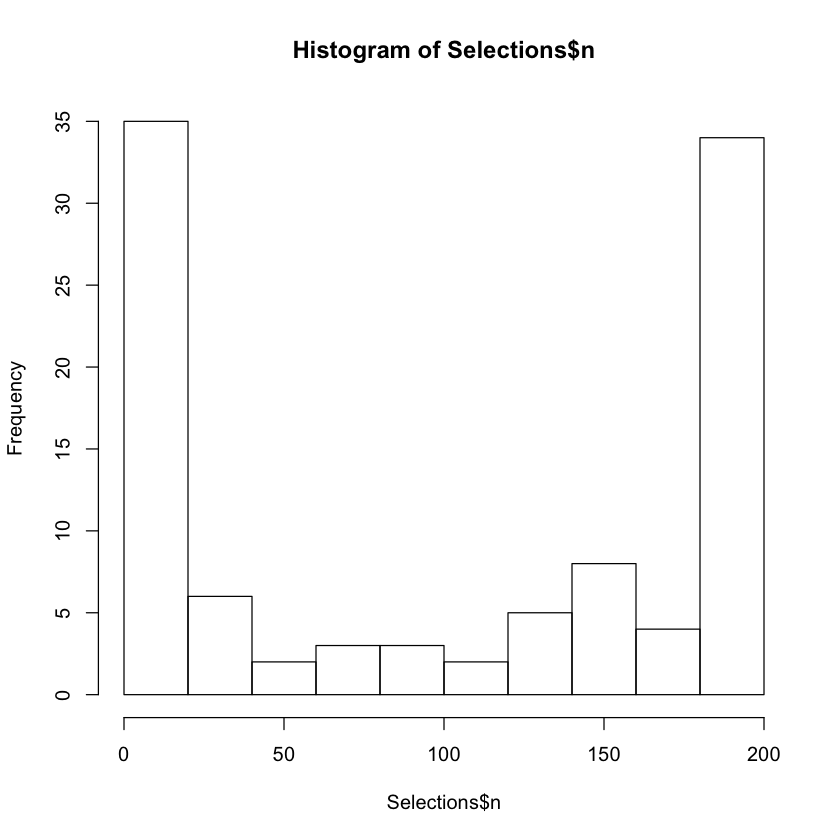

In [87]:
#Quick plot - Doesn't show up in Jupyterlab but does in standard Jupyter notebook
# perhaps because of black screen view??
hist(Selections$n)

#### Adjusting Dataframe for Visualization

In [88]:
#select( ) function: #Objective - Reduce dataframe size to only desired variables for current task

sub <- select(d_DuelingBandits,participant_uid, timestamp_answer_received, 
              target_left, target_right, target_winner, alg_label, response_time)

#### Removing underscores from variable names for clairity and renaming so that elements can be put in order stub.yaml requires

#### If you get a Warning message, check whether the image files are .jpg or .jpeg and change accordingly.

e.g. Warning message:
"Too few values at 22652 locations: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ..."

In [89]:
# separating data based on underscore used in distinguishing common elements among variables
#separate( ) function: #Objective - Splitting a single variable into two

sub <- separate(sub, target_right, 
                        c("bucket3", "tr"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tr, 
                        c("Right", "bucket4"), sep = ".jpg", remove = TRUE, convert = FALSE)

sub <- separate(sub, target_left, 
                        c("bucket5", "tl"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tl, 
                        c("Left", "bucket6"), sep = ".jpg", remove = TRUE,  convert = FALSE)

sub <- separate(sub, target_winner, 
                        c("bucket7", "tw"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tw, 
                        c("Answer", "bucket8"), sep = ".jpg", remove = TRUE,  convert = FALSE)

#### Selecting variables that are needed

In [90]:
d_DuelingBandits_sub <- select(sub,participant_uid, timestamp_answer_received, Left, Right, Answer, alg_label, response_time)

#### Renaming Variables 

In [91]:
d_DuelingBandits_sub$Participant.ID <- d_DuelingBandits_sub$participant_uid

In [92]:
d_DuelingBandits_sub <- separate(d_DuelingBandits_sub, participant_uid, 
                            c("Session", "Participant.ID.sub"), sep = "_", remove = TRUE, convert = FALSE)

In [93]:
d_DuelingBandits_sub <- d_DuelingBandits_sub %>% 
  rename(
     Timestamp = timestamp_answer_received,
     Response.Time..s. = response_time,
     Alg.Label = alg_label
    )

#### Creating labeled Condition variable

In [94]:
d_DuelingBandits_sub <- d_DuelingBandits_sub %>% 
  mutate(Condition = "CUBE_DuelingBandits")

#### Checking state of data

In [95]:
d_DuelingBandits_sub 

Session,Participant.ID.sub,Timestamp,Left,Right,Answer,Alg.Label,Response.Time..s.,Participant.ID,Condition
<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>,<fct>,<chr>
c3cb439c448e7d39a7c8cbbc821891,QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2019-07-15 21:26:14.082564,DAM3D015_P_CUDedit,DAM3D025_P_CUDedit,DAM3D015_P_CUDedit,BR_Random,3.946,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,CUBE_DuelingBandits
c3cb439c448e7d39a7c8cbbc821891,QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2019-07-15 21:26:16.840996,DAM3D019_P_CUAedit,DAM3D067_F_CUDedit,DAM3D019_P_CUAedit,BR_Random,2.149,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,CUBE_DuelingBandits
c3cb439c448e7d39a7c8cbbc821891,QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2019-07-15 21:26:20.299804,DAM3D053_P_CUAedit,DAM3D002_P_CUAedit,DAM3D053_P_CUAedit,BR_Random,2.846,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,CUBE_DuelingBandits
c3cb439c448e7d39a7c8cbbc821891,QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2019-07-15 21:26:22.147509,DAM3D047_T_CUAedit,DAM3D010_F_CUDedit,DAM3D047_T_CUAedit,BR_Random,1.331,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,CUBE_DuelingBandits
c3cb439c448e7d39a7c8cbbc821891,QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2019-07-15 21:26:24.833460,DAM3D044_P_CUAedit,DAM3D019_P_CUAedit,DAM3D044_P_CUAedit,BR_Random,2.086,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,CUBE_DuelingBandits
c3cb439c448e7d39a7c8cbbc821891,QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2019-07-15 21:26:27.719568,DAM3D006_F_CUDedit,DAM3D018_P_CUDedit,DAM3D006_F_CUDedit,BR_Random,2.255,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,CUBE_DuelingBandits
c3cb439c448e7d39a7c8cbbc821891,QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2019-07-15 21:26:29.670825,DAM3D044_F_CUAedit,DAM3D018_P_CUDedit,DAM3D044_F_CUAedit,BR_Random,1.430,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,CUBE_DuelingBandits
c3cb439c448e7d39a7c8cbbc821891,QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2019-07-15 21:26:31.959836,DAM3D059_F_CUAedit,DAM3D060_F_CUAedit,DAM3D059_F_CUAedit,BR_Random,1.748,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,CUBE_DuelingBandits
c3cb439c448e7d39a7c8cbbc821891,QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,2019-07-15 21:26:33.804714,DAM3D038_T_CUAedit,DAM3D068_F_CUAedit,DAM3D068_F_CUAedit,BR_Random,1.195,c3cb439c448e7d39a7c8cbbc821891_QzIIF7nKnM4R68jNJsMSBPbiq5HUe7,CUBE_DuelingBandits


#### Creating a Random Number to turn some trials into Training cases and some into Test for holdout model comparison

In [96]:
d_DuelingBandits_sub$RandNum <- sample(10, size = nrow(d_DuelingBandits_sub), replace = TRUE)

In [97]:
d_DuelingBandits_sub <- d_DuelingBandits_sub %>%
     mutate(Alg.Label= sub("BR_Random", "Train",Alg.Label))

In [98]:
DuelingBandits_data <- d_DuelingBandits_sub %>% mutate(Alg.Label = ifelse(Alg.Label == "Train" & RandNum == 1, "Test", "Train"))

#### Removing Random Number created for model comparison

In [99]:
DuelingBandits_data <- select (DuelingBandits_data,-c(RandNum))

#### Reorganizing variables for stub.yaml processing

In [100]:
DuelingBandits_data <- DuelingBandits_data[,c("Participant.ID","Timestamp","Left","Right","Answer",
          "Alg.Label","Response.Time..s.","Participant.ID.sub","Condition","Session")]

### Export data file

In [101]:
#PC - must map network Z drive to rogerslab.drive.wisc.edu first
#setwd("Z:/NEXT/NEXTdrawings/Data/NEXTdrawingsData/CUBE_DuelingBandits")

#Mac - must connect to rogerslab.drive.wisc.edu first
setwd("/Volumes/rogerslab/NEXT/NEXTdrawings/Data/NEXTdrawingsData/CUBE_DuelingBandits")

In [ ]:
write.csv(DuelingBandits_data, file = "stub.yamlStyle_CUBE_DuelingBandits_data.csv")

# <font color='blue'>  CYLINDER </font>

#### Setting R to file where data is stored

In [102]:
#PC - must map network Z drive to rogerslab.drive.wisc.edu first
#setwd("Z:/NEXT/NEXTdrawings/Data/NEXTdrawingsData/CYLINDER_DuelingBandits/NEXT_Output")

#Mac - must connect to rogerslab.drive.wisc.edu first
setwd("/Volumes/rogerslab/NEXT/NEXTdrawings/Data/NEXTdrawingsData/CYLINDER_DuelingBandits/NEXT_Output")

In [103]:
filenames <- list.files(pattern="*.csv")

In [104]:
filenames

[1] "NEXTdrawings CYLINDER Data 2019_07_11-2019_07_12.csv"
[2] "NEXTdrawings CYLINDER Data 2019_07_13.csv"

In [105]:
Server_data <- list.files(pattern="*.csv", full.names = TRUE)
d_DuelingBandits <- do.call(rbind, lapply(Server_data,read.csv))

#### Checking data file

In [106]:
d_DuelingBandits

X,alg_id,alg_label,context,context_type,exp_uid,left_id,network_delay,participant_uid,query_uid,response_time,right_id,target_left,target_right,target_winner,timestamp_answer_received,timestamp_query_generated,winner_id
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
0,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CYA_3D_Cylinder_edit.jpeg,image,bf151d2708c0b425f4ff665459a640,158,0.296612,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,461b45ab80ec3a89d17cbfe7bd185e86,8.414,137,http://clintsbucket.s3.amazonaws.com/DAM3D061_T_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D052_P_CYAedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D061_T_CYDedit.jpeg,2019-07-11 17:22:34.859404,2019-07-11 17:22:26.148792,158
1,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CYA_3D_Cylinder_edit.jpeg,image,bf151d2708c0b425f4ff665459a640,45,0.158278,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,aab087b9b6d15c9612d39a7be15e9d7e,1.703,175,http://clintsbucket.s3.amazonaws.com/DAM3D017_T_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D067_P_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D017_T_CYDedit.jpeg,2019-07-11 17:22:37.065926,2019-07-11 17:22:35.204648,45
2,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CYA_3D_Cylinder_edit.jpeg,image,bf151d2708c0b425f4ff665459a640,60,0.171746,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,cc17138917ad97831dbb7de9e85bcf89,1.419,32,http://clintsbucket.s3.amazonaws.com/DAM3D022_T_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D011_T_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D011_T_CYDedit.jpeg,2019-07-11 17:22:39.009821,2019-07-11 17:22:37.419075,32
3,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CYA_3D_Cylinder_edit.jpeg,image,bf151d2708c0b425f4ff665459a640,6,0.261810,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,80829f563b50cf0568ab37a3b7bebb9f,3.609,79,http://clintsbucket.s3.amazonaws.com/DAM3D002_P_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D029_F_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D002_P_CYDedit.jpeg,2019-07-11 17:22:43.219860,2019-07-11 17:22:39.349050,6
4,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CYA_3D_Cylinder_edit.jpeg,image,bf151d2708c0b425f4ff665459a640,107,0.167695,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,d619b6e219d85f2845a131fac6881060,1.351,86,http://clintsbucket.s3.amazonaws.com/DAM3D039_F_CYAedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D031_P_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D039_F_CYAedit.jpeg,2019-07-11 17:22:45.082421,2019-07-11 17:22:43.563726,107
5,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CYA_3D_Cylinder_edit.jpeg,image,bf151d2708c0b425f4ff665459a640,132,0.159444,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,03f13aad8e67256cbab3a2ea4389c14b,1.800,166,http://clintsbucket.s3.amazonaws.com/DAM3D050_P_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D064_P_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D064_P_CYDedit.jpeg,2019-07-11 17:22:47.389616,2019-07-11 17:22:45.430172,166
6,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CYA_3D_Cylinder_edit.jpeg,image,bf151d2708c0b425f4ff665459a640,131,0.255301,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,7601191e32178e3f1a1648a31852fce0,5.461,8,http://clintsbucket.s3.amazonaws.com/DAM3D050_F_CYDedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D003_F_CYAedit.jpeg,http://clintsbucket.s3.amazonaws.com/DAM3D050_F_CYDedit.jpeg,2019-07-11 17:22:53.444273,2019-07-11 17:22:47.727972,131
7,BR_Random,BR_Random,https://banditsbucket.s3-us-west-2.amazonaws.com/CYA_3D_Cylinder_edit.jpeg,image,bf151d2708c0b425f4ff665459a640,154,0.162202,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,5d08b65aea7e3c52882ffbd86

### Number of Participants Total

In [107]:
# how many subjects in total?
aggregate(participant_uid~participant_uid  , data=d_DuelingBandits, FUN=function(x) length(unique(x)))

participant_uid
<int>
69


### Total Number of NEXTdrawings Selections

In [108]:
d_DuelingBandits  %>% count("participant_uid")

"""participant_uid""",n
<chr>,<int>
participant_uid,10174


In [109]:
Selections <-
d_DuelingBandits %>%
 count(exp_uid, participant_uid, sort = TRUE)
Selections

exp_uid,participant_uid,n
<fct>,<fct>,<int>
bf151d2708c0b425f4ff665459a640,bf151d2708c0b425f4ff665459a640_627C4cEDsvBbCJqVsy59Wkc9l5Plwr,200
bf151d2708c0b425f4ff665459a640,bf151d2708c0b425f4ff665459a640_aSiwcWuQ8P39BWGi2s1kNbvfVDvGPG,200
bf151d2708c0b425f4ff665459a640,bf151d2708c0b425f4ff665459a640_d8VIKjmb5KX03RosCcBhQpnUlFvKXf,200
bf151d2708c0b425f4ff665459a640,bf151d2708c0b425f4ff665459a640_gfABENz9xVrdbsmdrP9GNfGE2i9NqM,200
bf151d2708c0b425f4ff665459a640,bf151d2708c0b425f4ff665459a640_gm6yULFCpCBnFVZd3r3aVwadC42971,200
bf151d2708c0b425f4ff665459a640,bf151d2708c0b425f4ff665459a640_iCl5DKdXeHAcQBhRVUA6Q2Im4elTSg,200
bf151d2708c0b425f4ff665459a640,bf151d2708c0b425f4ff665459a640_kXaxilgUhQ8sDX28hfKcfluWUNIuMa,200
bf151d2708c0b425f4ff665459a640,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,200
bf151d2708c0b425f4ff665459a640,bf151d2708c0b425f4ff665459a640_oGsrQeuixKo5AejG0RMAbChq1bq49u,200


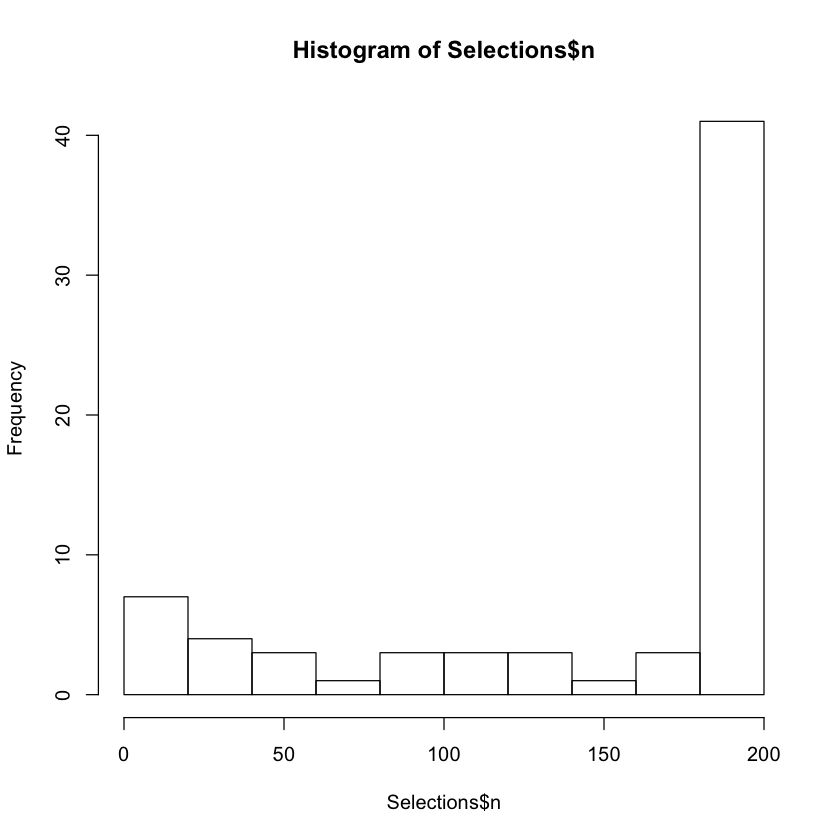

In [110]:
#Quick plot - Doesn't show up in Jupyterlab but does in standard Jupyter notebook
# perhaps because of black screen view??
hist(Selections$n)

#### Adjusting Dataframe for Visualization

In [111]:
#select( ) function: #Objective - Reduce dataframe size to only desired variables for current task

sub <- select(d_DuelingBandits,participant_uid, timestamp_answer_received, 
              target_left, target_right, target_winner, alg_label, response_time)

#### Removing underscores from variable names for clairity and renaming so that elements can be put in order stub.yaml requires

#### If you get a Warning message, check whether the image files are .jpg or .jpeg and change accordingly.

e.g. Warning message:
"Too few values at 22652 locations: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ..."

In [112]:
# separating data based on underscore used in distinguishing common elements among variables
#separate( ) function: #Objective - Splitting a single variable into two

sub <- separate(sub, target_right, 
                        c("bucket3", "tr"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tr, 
                        c("Right", "bucket4"), sep = ".jpeg", remove = TRUE, convert = FALSE)

sub <- separate(sub, target_left, 
                        c("bucket5", "tl"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tl, 
                        c("Left", "bucket6"), sep = ".jpeg", remove = TRUE,  convert = FALSE)

sub <- separate(sub, target_winner, 
                        c("bucket7", "tw"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tw, 
                        c("Answer", "bucket8"), sep = ".jpeg", remove = TRUE,  convert = FALSE)

#### Selecting variables that are needed

In [113]:
d_DuelingBandits_sub <- select(sub,participant_uid, timestamp_answer_received, Left, Right, Answer, alg_label, response_time)

#### Renaming Variables 

In [114]:
d_DuelingBandits_sub$Participant.ID <- d_DuelingBandits_sub$participant_uid

In [115]:
d_DuelingBandits_sub <- separate(d_DuelingBandits_sub, participant_uid, 
                            c("Session", "Participant.ID.sub"), sep = "_", remove = TRUE, convert = FALSE)

In [116]:
d_DuelingBandits_sub <- d_DuelingBandits_sub %>% 
  rename(
     Timestamp = timestamp_answer_received,
     Response.Time..s. = response_time,
     Alg.Label = alg_label
    )

#### Creating labeled Condition variable

In [117]:
d_DuelingBandits_sub <- d_DuelingBandits_sub %>% 
  mutate(Condition = "CYLINDER_DuelingBandits")

#### Checking state of data

In [118]:
d_DuelingBandits_sub 

Session,Participant.ID.sub,Timestamp,Left,Right,Answer,Alg.Label,Response.Time..s.,Participant.ID,Condition
<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>,<fct>,<chr>
bf151d2708c0b425f4ff665459a640,LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,2019-07-11 17:22:34.859404,DAM3D061_T_CYDedit,DAM3D052_P_CYAedit,DAM3D061_T_CYDedit,BR_Random,8.414,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,CYLINDER_DuelingBandits
bf151d2708c0b425f4ff665459a640,LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,2019-07-11 17:22:37.065926,DAM3D017_T_CYDedit,DAM3D067_P_CYDedit,DAM3D017_T_CYDedit,BR_Random,1.703,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,CYLINDER_DuelingBandits
bf151d2708c0b425f4ff665459a640,LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,2019-07-11 17:22:39.009821,DAM3D022_T_CYDedit,DAM3D011_T_CYDedit,DAM3D011_T_CYDedit,BR_Random,1.419,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,CYLINDER_DuelingBandits
bf151d2708c0b425f4ff665459a640,LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,2019-07-11 17:22:43.219860,DAM3D002_P_CYDedit,DAM3D029_F_CYDedit,DAM3D002_P_CYDedit,BR_Random,3.609,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,CYLINDER_DuelingBandits
bf151d2708c0b425f4ff665459a640,LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,2019-07-11 17:22:45.082421,DAM3D039_F_CYAedit,DAM3D031_P_CYDedit,DAM3D039_F_CYAedit,BR_Random,1.351,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,CYLINDER_DuelingBandits
bf151d2708c0b425f4ff665459a640,LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,2019-07-11 17:22:47.389616,DAM3D050_P_CYDedit,DAM3D064_P_CYDedit,DAM3D064_P_CYDedit,BR_Random,1.800,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,CYLINDER_DuelingBandits
bf151d2708c0b425f4ff665459a640,LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,2019-07-11 17:22:53.444273,DAM3D050_F_CYDedit,DAM3D003_F_CYAedit,DAM3D050_F_CYDedit,BR_Random,5.461,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,CYLINDER_DuelingBandits
bf151d2708c0b425f4ff665459a640,LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,2019-07-11 17:22:55.595767,DAM3D060_P_CYDedit,DAM3D056_P_CYDedit,DAM3D060_P_CYDedit,BR_Random,1.633,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,CYLINDER_DuelingBandits
bf151d2708c0b425f4ff665459a640,LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,2019-07-11 17:22:59.300831,DAM3D056_F_CYAedit,DAM3D066_T_CYAedit,DAM3D066_T_CYAedit,BR_Random,3.065,bf151d2708c0b425f4ff665459a640_LgfxmTf3YgFk5FkGNdK8Xox3mdkYiI,CYLINDER_DuelingBandits


#### Creating a Random Number to turn some trials into Training cases and some into Test for holdout model comparison

In [119]:
d_DuelingBandits_sub$RandNum <- sample(10, size = nrow(d_DuelingBandits_sub), replace = TRUE)

In [120]:
d_DuelingBandits_sub <- d_DuelingBandits_sub %>%
     mutate(Alg.Label= sub("BR_Random", "Train",Alg.Label))

In [121]:
DuelingBandits_data <- d_DuelingBandits_sub %>% mutate(Alg.Label = ifelse(Alg.Label == "Train" & RandNum == 1, "Test", "Train"))

#### Removing Random Number created for model comparison

In [122]:
DuelingBandits_data <- select (DuelingBandits_data,-c(RandNum))

#### Reorganizing variables for stub.yaml processing

In [123]:
DuelingBandits_data <- DuelingBandits_data[,c("Participant.ID","Timestamp","Left","Right","Answer",
          "Alg.Label","Response.Time..s.","Participant.ID.sub","Condition","Session")]

### Export data file

In [124]:
#PC - must map network Z drive to rogerslab.drive.wisc.edu first
#setwd("Z:/NEXT/NEXTdrawings/Data/NEXTdrawingsData/CYLINDER_DuelingBandits")

#Mac - must connect to rogerslab.drive.wisc.edu first
setwd("/Volumes/rogerslab/NEXT/NEXTdrawings/Data/NEXTdrawingsData/CYLINDER_DuelingBandits")

In [ ]:
write.csv(DuelingBandits_data, file = "stub.yamlStyle_CYLINDER_DuelingBandits_data.csv")